# Linear Regression

Regression refers to predictive modeling problems that involve predicting a numeric value.

## Basics

Linear regression is a predictive modeling technique. It is used whenever there is a linear relation between the dependent and the independent variables. 

Y = b0 + b1* x

(bo - intercept; b1 - slope of the line)

In other words, it is used in estimating exactly how much of y will change when x changes a certain amount.

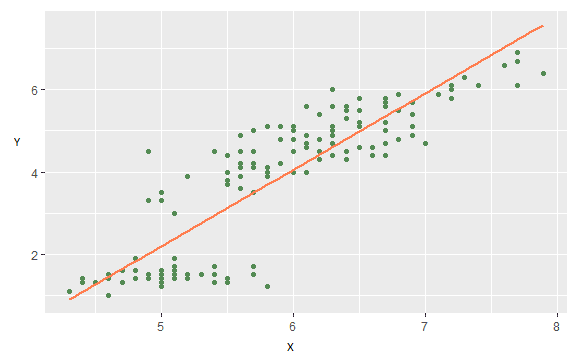

The term “linearity” in algebra refers to a linear relationship between two or more variables. If we draw this relationship in a two-dimensional space (between two variables), we get a straight line. The line of best fit is nothing but the line that best expresses the relationship between the data points. 

Linear regression involving multiple variables is called “multiple linear regression” or multivariate linear regression.

Y = b0 + b1* x1 + b2*x2 + ... + bnxn + e

*   Y - dependent variable
*   x - indipendent variables (predictors, explanatory variables)
*   b - coefficient
*   e - random error, noise

Linear regression calculates the estimators of the regression coefficients or simply the predicted weights, denoted with 𝑏₀, 𝑏₁, …, 𝑏ᵣ. These estimators define the estimated regression function 𝑓(𝐱) = 𝑏₀ + 𝑏₁𝑥₁ + ⋯ + 𝑏ᵣ𝑥ᵣ. This function should capture the dependencies between the inputs and output sufficiently well.

## Residual plots

Linear regression tries to fit a line that produces the smallest difference between predicted and actual values, where these differences are unbiased as well. This difference or error is also known as residual.

The estimated or predicted response, 𝑓(𝐱ᵢ), for each observation 𝑖 = 1, …, 𝑛, should be as close as possible to the corresponding actual response 𝑦ᵢ. The differences 𝑦ᵢ - 𝑓(𝐱ᵢ) for all observations 𝑖 = 1, …, 𝑛, are called the residuals. Regression is about determining the best predicted weights—that is, the weights corresponding to the smallest residuals.

To get the best weights, we usually minimize the sum of squared residuals (SSR) for all observations 𝑖 = 1, …, 𝑛: SSR = Σᵢ(𝑦ᵢ - 𝑓(𝐱ᵢ))². This approach is called the method of ordinary least squares.

Residual plots expose a biased model more than any other evaluation metric. If  residual plots look normal, a model can be evaluated with various metrics.

Residual plot showing the errors corresponding to the predicted values must be randomly distributed. However, if there are any signs of a systematic pattern, then a model is biased.


## Diagnostic plots

Diagnostic plots can be used to examine how well a model satisfies the key assumptions of linear regression:
*   Linearity: there is a linear relationship between features and responses. This is required for an estimator and predictions to be unbiased.
*   No multicollinearity: features are not correlated. If this is not satisfied, an estimator will suffer from high variance.
*   Normality of residuals
*   Homoskedasticity: the variance of residuals remains more or less constant across the regression line. If this is not satisfied, there will be other linear estimators with lower variance.
*   No high leverage points (observations that have unusually high/low predictor values are considered to have high leverage).



## Evaluation metrics

There are several error metrics that are commonly used for evaluating and reporting the performance of a regression model; they are:

*   Mean Absolute Error (MAE)
*   Mean Squared Error (MSE)
*   R-squared
*   Adjusted R-squared
*   Root Mean Squared Error (RMSE).

### MAE

MAE is simply the average of the absolute difference between the target value and the value predicted by the model. It is not preferred in cases where outliers are prominent. MAE does not penalize large errors.

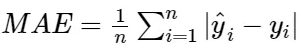

### MSE

MSE is the most common metric for regression tasks. It has a convex shape. It is the average of the squared difference between the predicted and actual value. Since it is differentiable and has a convex shape, it is easier to optimize. MSE penalizes large errors.

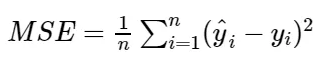

### R-squared

R-squared or Coefficient of Determination represents the part of the variance of the dependent variable explained by the independent variables of the model. It measures the strength of the relationship between your model and the dependent variable.

RSS (Residual sum of squares) can be calculated as follows.

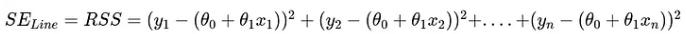

The total variation in Y can be given as a sum of squared differences of the distance between every point and the arithmetic mean of Y values. This can be termed as TSS (Total sum of squares).

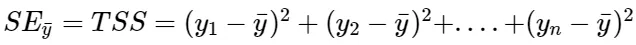

**RSS/TSS -> represents the part of the variance of y, not described by the line**

**R² = 1 - RSS/TSS -> represents the part of the variance, described by the independent variables**

If the data points are very close to the regression line, then the model accounts for a good amount of variance, thus resulting in a high R² value. However, a good model can have low R² value and a biased model can have a high R² value as well. That is the reason you should make use of residual plots.

When a model considers all of the predictors or regressor variables, it is termed as a full model. If one or more regressor variables or predictors are dropped, then this model is a subset model.

The general idea behind subset regression is to find which does better. The subset model or the full model. A simpler model that adequately explains the relationship is always a better option due to the reduced complexity. 

### Adjusted R-squared 

The main difference between adjusted R-squared and R-square is that R-squared describes the amount of variance of the dependent variable represented by every single independent variable, while adjusted R-squared measures variation explained by only the independent variables that actually affect the dependent variable.

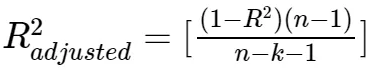

In the equation above, n is the number of data points while k is the number of variables in your model, excluding the constant.

R² tends to increase with an increase in the number of independent variables. This could be misleading. Thus, the adjusted R-squared penalizes the model for adding furthermore independent variables (k in the equation) that do not fit the model.

### RMSE

RMSE is the square root of the average of the squared difference of the predicted and actual value. Since residuals are a measure of how distant the points are from the regression line, RMSE measures the scatter of these residuals.

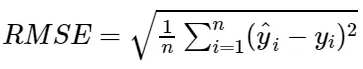

# Data preparation


In [ ]:
# Boston housing dataset contains following columns:

# Crim: Per capita crime rate by town
# Zn: Proportion of residential land zoned for lots over 25,000 sq. ft.
# Indus: Proportion of non-retail business acres per town
# Chas: Charles River dummy variable (= 1 if tract bounds river; 0, otherwise)
# Nox: Nitrogen oxides concentration (parts per 10 million)
# Rm: Average number of rooms per dwelling
# Age: Proportion of owner-occupied units built before 1940
# Dis: Weighted mean of distances to five Boston employment centers
# Rad: Index of accessibility to radial highways
# Tax: Full-value property tax rate per $10,000
# Ptratio: Pupil–Teacher ratio by town
# Black: 1000(Bk – 0.63) ^2, where Bk is the proportion of Blacks by town
# Lstat: Lower status of the population (percent)
# Medv: Median value of owner-occupied homes in $1000s

In [ ]:
#@title Data load from GitHub
# Load a csv file from GitHub by coping a raw csv link
import numpy as np
import pandas as pd

#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'

df = pd.read_csv(url)
df.shape

(506, 14)

In [ ]:
# Detaset variables info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
# Checking if the dataset has missing values
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [ ]:
#@title Checking data
# First 5 rows
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# Last 5 rows
df.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [ ]:
# Having a look at a dependent variable and the independent variable
df_ = df.loc[:, ['lstat', 'medv']]
df_.head()

,lstat,medv
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [ ]:
# Describing numerical variables
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


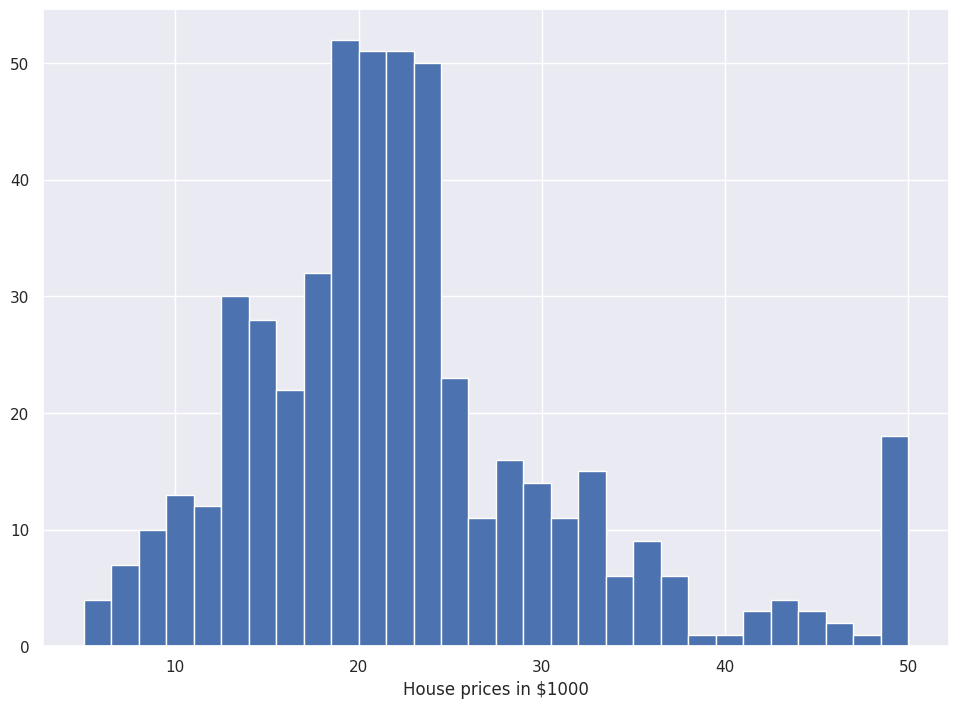

In [ ]:
#@title Data visualization

# Ploting the distribution of the target variable
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(df['medv'], bins=30)
plt.xlabel("House prices in $1000")
plt.show()

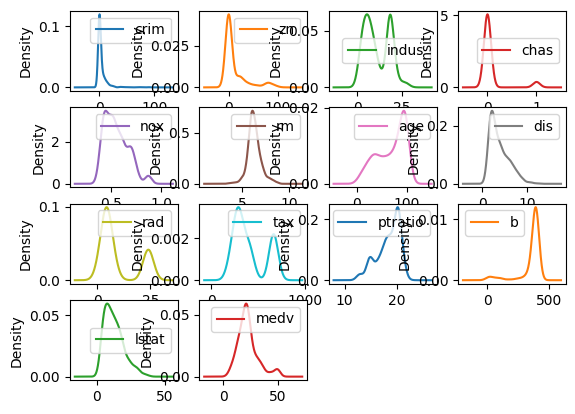

In [ ]:
# Univariate Plots (Density Plots)
from matplotlib import pyplot

df.plot(kind='density', subplots=True, layout=(4,4), sharex=False)
pyplot.show()

<Axes: >

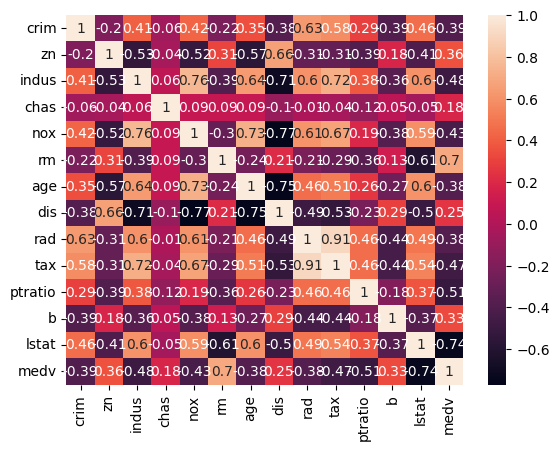

In [ ]:
# Visualizing correlation matrics
correlation_matrix = df.corr().round(2)

# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
# To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV.
# By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as
# LSTAT has a high negative correlation with MEDV(-0.74).

# An important point in selecting features for a linear regression model is to check for multi-co-linearity. 
# The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other.
# We should not select both these features together for training the model.
# Same goes for the features DIS and AGE which have a correlation of -0.75.

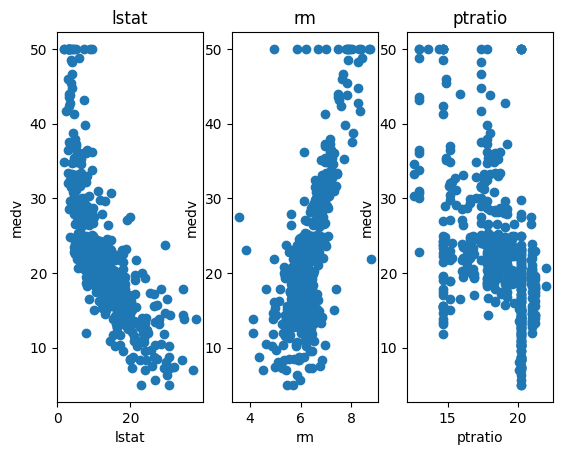

In [ ]:
# Visualizing the change in the variables
import matplotlib.pyplot as plt

features = ['lstat', 'rm', 'ptratio']
target = df['medv']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('medv')

# Linear Regression Models


In [ ]:
#@title Simple Linear Regression 1
from sklearn.linear_model import LinearRegression

# Splitting data
from sklearn.model_selection import train_test_split

x1 = pd.DataFrame(df['lstat'])
y1 = pd.DataFrame(df['medv'])

In [ ]:
# Splitting train and test data
# random_state = const; it's just a constant which is mapped to some internal state
  ## to make sure that you obtain the same split everytime you run your script.
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 5)

# Shape of the train and test sets
print(x1_train.shape)
print(x1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [ ]:
# Initializing LinearRegression model
lr1 = LinearRegression()

# Fitting the model
lr1 = lr1.fit(x1_train, y1_train)

In [ ]:
# Retreiving the intercept
print(lr1.intercept_)

[34.87291568]


In [ ]:
# Retreiving the slope
print(lr1.coef_)

[[-0.97981166]]


In [ ]:
# Predicting values for the train set
predicted_y1_train = lr1.predict(x1_train)

# Predicting values for the test set
predicted_y1_test = lr1.predict(x1_test)

In [ ]:
predicted_y1_test.flatten()

array([31.80610519, 30.26780089, 26.24077499,  0.80486439, 28.42575498,
        8.77073316, 29.34677794, 26.98543185, 24.91802925, 20.8028203 ,
       28.80788153, 25.32955015, 25.10419347, 28.0828209 , 27.29897158,
       22.458702  ,  1.19678906, 21.86101688, 14.15969727, 24.96701983,
        5.79210572, 23.97741006, 30.81649542, 24.72206692, 27.18139418,
       11.56319638, 28.1416096 , 23.07598334, 29.30758547, 29.49374969,
        9.9759015 , 11.38683028, 18.8529951 , 18.47086855, 26.37794862,
       22.86042477, 25.52551248, 10.97530939, 29.08222879, 32.9328886 ,
       20.00917285,  1.15759659, 27.42634709, 16.2466961 , 27.63210754,
       28.92545893, -1.36051937, 17.30489268, 21.05757133, 11.20066607,
       21.06736944, 22.3411246 , 26.11339947, 14.94354659, 19.40168963,
       29.21940242, 31.37498807, 17.10893035, 28.72949659, 21.6944489 ,
       20.83221465, 24.96701983, 18.02995331, 30.37558018, 23.62467787,
       15.50203924, 22.33132648, 27.58311696, 25.19237652, 23.65

In [ ]:
# Comparing the predicted and actual values
# y1_test is a pandas.core.frame.DataFrame, so to_numpy() is used to transform it into numpy.ndarray
# predicted_y1_test is numpy.ndarray
# flatten() is used to transform multidimensional ndarrays into flat structures
df_compare1 = pd.DataFrame({'Actual': y1_test.to_numpy().flatten(), 'Predicted': predicted_y1_test.flatten()})
df_compare1.head()

,Actual,Predicted
0,37.6,31.806105
1,27.9,30.267801
2,22.6,26.240775
3,13.8,0.804864
4,35.2,28.425755


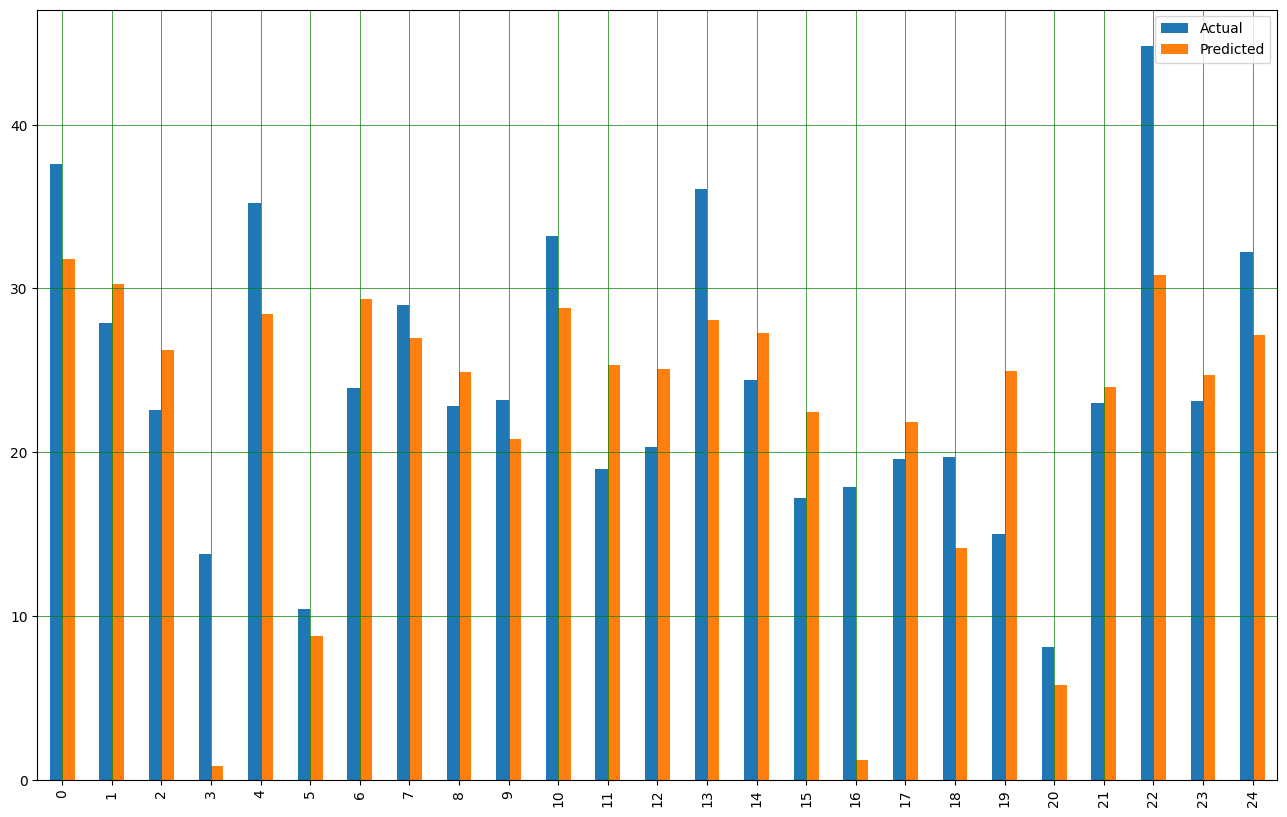

In [ ]:
#@title Simple Linear Regression 1 Vizualization

# Visualizing the comparison of the predicted and actual values (the first 25 values)
df_viz1 = df_compare1.head(25)
df_viz1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

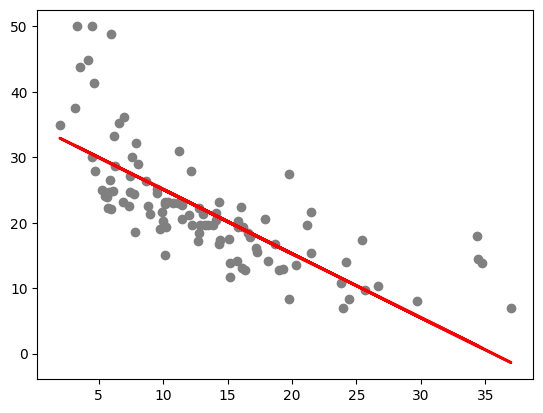

In [ ]:
# Plotting a straight line with test data
plt.scatter(x1_test, y1_test,  color='gray')
plt.plot(x1_test, predicted_y1_test, color='red', linewidth=2)
plt.show()

In [ ]:
#@title Simple Linear Regression 1 Evaluation
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# Model evaluation for the training set

# Computing (adjusted) r-squared with formulas from the theory
y1_train_array = y1_train.to_numpy().flatten()
pred_y1_train_array = predicted_y1_train.flatten()

RSS1 = sum((y1_train_array-pred_y1_train_array)**2)       
TSS1 = sum((y1_train_array-np.mean(y1_train_array))**2)     
r_squared1 = 1 - RSS1/TSS1
adj_r_squared1 = 1 - (1-r_squared1)*(len(y1_train_array)-1)/(len(y1_train_array)-x1_test.shape[1]-1)

# another way to calculate r_squared (r2) using sklearn.metrics
# adj_r_squared1 = r2_score(y1_train, predicted_y1_train)

# Using metrics api to calculate errors
mae1 = metrics.mean_absolute_error(y1_train, predicted_y1_train)
mse1 = metrics.mean_squared_error(y1_train, predicted_y1_train)
rmse1 = np.sqrt(metrics.mean_squared_error(y1_train, predicted_y1_train))

print('R2:', r_squared1)
print('Adjusted R2:', adj_r_squared1)
print('Mean Absolute Error:', mae1)  
print('Mean Squared Error:', mse1)  
print('Root Mean Squared Error:', rmse1)

R2: 0.5523019908037398
Adjusted R2: 0.5511883141639481
Mean Absolute Error: 4.50101768097332
Mean Squared Error: 38.45801898706332
Root Mean Squared Error: 6.201452973865344


In [ ]:
# Model evaluation for the test set

# Computing (adjusted) r-squared with formulas from the theory
y1_test_array = y1_test.to_numpy().flatten()
pred_y1_test_array = predicted_y1_test.flatten()

RSS1 = sum((y1_test_array-pred_y1_test_array)**2)       
TSS1 = sum((y1_test_array-np.mean(y1_test_array))**2)     
r_squared1 = 1 - RSS1/TSS1
adj_r_squared1 = 1 - (1-r_squared1)*(len(y1_test_array)-1)/(len(y1_test_array)-x1_test.shape[1]-1)

# another way to calculate r_squared (r2) using sklearn.metrics
# r_squared1 = r2_score(y1_test, pred_y1_test_array)

# Using metrics api
mae1 = metrics.mean_absolute_error(y1_test, pred_y1_test_array)
mse1 = metrics.mean_squared_error(y1_test, pred_y1_test_array)
rmse1 = np.sqrt(metrics.mean_squared_error(y1_test, pred_y1_test_array))

print('R2:', r_squared1)
print('Adjusted R2:', adj_r_squared1)
print('Mean Absolute Error:', mae1)  
print('Mean Squared Error:', mse1)  
print('Root Mean Squared Error:', rmse1)

R2: 0.5041523728903132
Adjusted R2: 0.4991938966192163
Mean Absolute Error: 4.552097941955834
Mean Squared Error: 38.82182901428658
Root Mean Squared Error: 6.2307165730986815


In [ ]:
# To get a perspective of how large RMSE is, the mean value of the response variable on the test
# set is calculated.

# Calculating the mean of the test medv
test_mean1 = y1_test.mean()

# Then, RMSE is compared with the mean of test medv
print(rmse1/test_mean1)

# Almost 30% is not a small error.

medv    0.282171
dtype: float64


In [ ]:
#@title Multiple Linear Regression 2

# Splitting data
x2 = pd.DataFrame(np.c_[df['lstat'], df['rm'], df['ptratio']], columns = ['lstat','rm','ptratio'])
y2 = df['medv']

In [ ]:
# Splitting train and test data
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 5)

# Shape of the train and test sets
print(x2_train.shape)
print(x2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(404, 3)
(102, 3)
(404,)
(102,)


In [ ]:
# Initializing LinearRegression model
lr2 = LinearRegression()

# Fitting the model
lr2 = lr2.fit(x2_train, y2_train)

In [ ]:
# Retreiving the intercept
print(lr2.intercept_)

23.681070268714812


In [ ]:
# Retreiving the slope
print(lr2.coef_)

[-0.64697098  3.9169303  -0.95483295]


In [ ]:
# Predicting values - train dataset
predicted_y2_train = lr2.predict(x2_train)

# Predicting values - test dataset
predicted_y2_test = lr2.predict(x2_test)

In [ ]:
# Comparing the predicted and actual values
df_compare2 = pd.DataFrame({'Actual': y2_test.to_numpy().flatten(), 'Predicted': predicted_y2_test.flatten()})
df_compare2.head()

,Actual,Predicted
0,37.6,36.534077
1,27.9,28.276762
2,22.6,26.120171
3,13.8,1.114724
4,35.2,31.789219


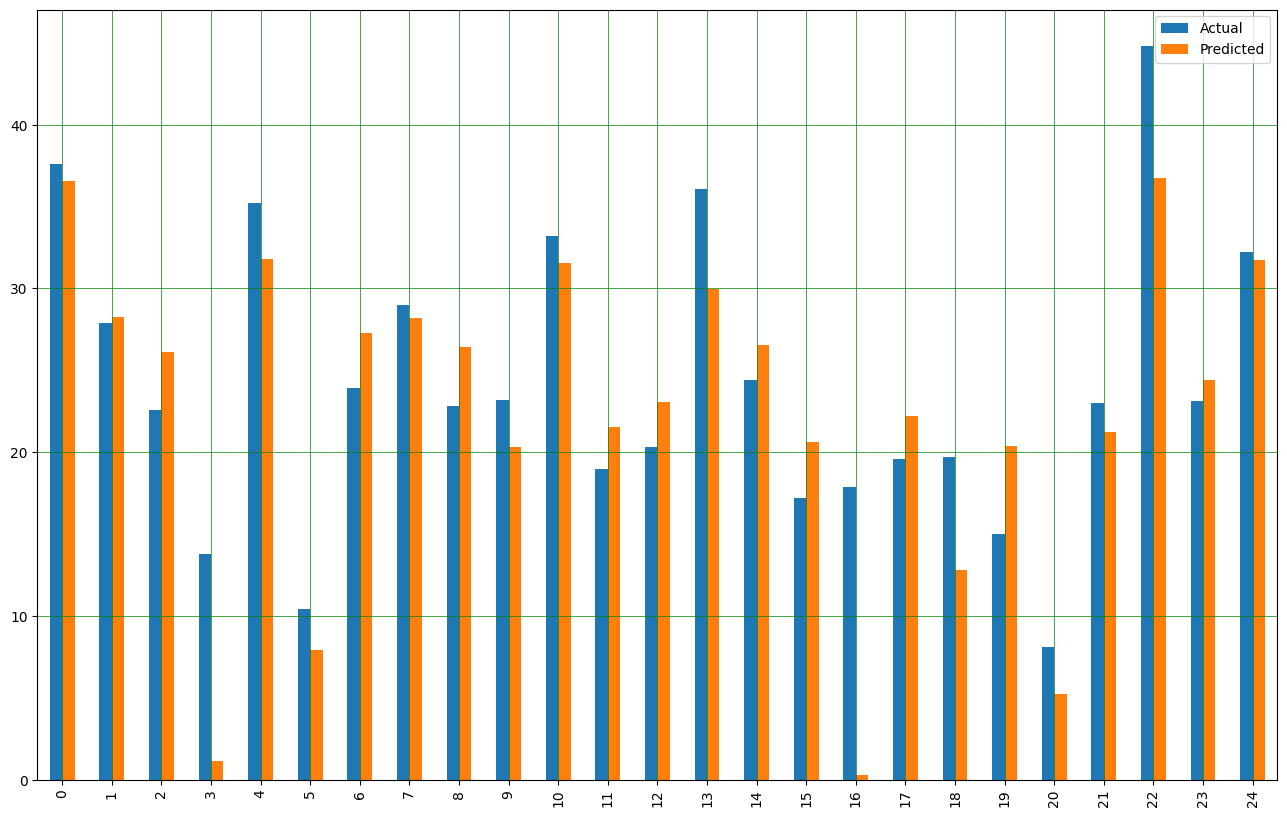

In [ ]:
#@title Multiple Linear Regression 2 Vizualization

# Visualizing the comparison of the predicted and actual values (the first 25 values)
df_viz3 = df_compare2.head(25)
df_viz3.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
#@title Multiple Linear Regression 2 Evaluation
from sklearn import metrics

# Training set
# Computing (adjusted) r-squared with formulas from the theory
y2_train_array = y2_train.to_numpy().flatten()
pred_y2_train_array = predicted_y2_train.flatten()

RSS2 = sum((y2_train_array-pred_y2_train_array)**2)       
TSS2 = sum((y2_train_array-np.mean(y2_train_array))**2)     
r_squared2 = 1 - RSS2/TSS2
adj_r_squared2 = 1 - (1-r_squared2)*(len(y2_train_array)-1)/(len(y2_train_array)-x2_train.shape[1]-1)

# another way to calculate r_squared (r2) using sklearn.metrics
r2 = r2_score(y2_train, pred_y2_train_array)

# Using metrics api to calculate errors
mae2 = metrics.mean_absolute_error(y2_train, predicted_y2_train)
mse2 = metrics.mean_squared_error(y2_train, predicted_y2_train)
rmse2 = np.sqrt(metrics.mean_squared_error(y2_train, predicted_y2_train))

print(r2)
print('R2:', r_squared2)  
print('Adjusted R2: ', adj_r_squared2)
print('Mean Absolute Error:', mae2)  
print('Mean Squared Error:', mse2)  
print('Root Mean Squared Error:', rmse2)

0.6725214335656511
R2: 0.6725214335656517
Adjusted R2:  0.6700653443173941
Mean Absolute Error: 3.6981718648969646
Mean Squared Error: 28.130964773326603
Root Mean Squared Error: 5.303863193307931


In [ ]:
# Test set

# Computing (adjusted) r-squared with formulas from the theory
y2_test_array = y2_test.to_numpy().flatten()
pred_y2_test_array = predicted_y2_test.flatten()

RSS2 = sum((y2_test_array-pred_y2_test_array)**2)       
TSS2 = sum((y2_test_array-np.mean(y2_test_array))**2)     
r_squared2 = 1 - RSS2/TSS2
adj_r_squared2 = 1 - (1-r_squared2)*(len(y2_test_array)-1)/(len(y2_test_array)-x2_test.shape[1]-1)

# another way to calculate r_squared (r2) using sklearn.metrics
r2 = r2_score(y2_test, pred_y2_test_array)


mae2 = metrics.mean_absolute_error(y2_test, predicted_y2_test)
mse2 = metrics.mean_squared_error(y2_test, predicted_y2_test)
rmse2 = np.sqrt(metrics.mean_squared_error(y2_test, predicted_y2_test))

print(r2)
print('R2:', r_squared2)  
print('Adjusted R2: ', adj_r_squared2)
print('Mean Absolute Error:', mae2)  
print('Mean Squared Error:', mse2)  
print('Root Mean Squared Error:', rmse2)

0.691587828074417
R2: 0.691587828074417
Adjusted R2:  0.6821466391379195
Mean Absolute Error: 3.6914772094857184
Mean Squared Error: 24.146782095563314
Root Mean Squared Error: 4.9139375347640835


In [ ]:
# To get a perspective of how large RMSE is, the mean value of the response variable on the test
# set is calculated.

# Calculating the mean of the test medv
test_mean2 = y2_test.mean()

# Then, RMSE is compared with the mean of test medv
print(rmse2/test_mean2)

0.222537685275468


In [ ]:
#@title Comparison of metrics (test datasets)

df_compare = pd.DataFrame([(r_squared1, r_squared2),
                           (adj_r_squared1, adj_r_squared2),
                           (mae1, mae2),
                           (mse1, mse2),
                           (rmse1, rmse2)],
           columns=('Simple Linear Regression', 'Multiple Linear Regression 1'),
           index=('R2', 'Adjusted R2', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error')
                 )

df_compare.head()

,Simple Linear Regression,Multiple Linear Regression 1
R2,0.504152,0.691588
Adjusted R2,0.499194,0.682147
Mean Absolute Error,4.552098,3.691477
Mean Squared Error,38.821829,24.146782
Root Mean Squared Error,6.230717,4.913938


In [ ]:
#@title Multiple Linear Regression 3 with Diagnostics
import statsmodels.api as sm
import statsmodels.formula.api as smf

# statsmodels.api and statsmodels.formula.api is used for building and fitting the linear regression model
# due to its diagnostics features.
# This api requires adding a constant to X, which is done with sm.add_constant(x2_train)
lr3 = sm.OLS(y2_train, sm.add_constant(x2_train))
lr3_results = lr3.fit()
print(lr3_results.summary())

# The diagnostic plots are run on the trained regression model before testing the model.

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     273.8
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           1.43e-96
Time:                        12:52:17   Log-Likelihood:                -1247.3
No. Observations:                 404   AIC:                             2503.
Df Residuals:                     400   BIC:                             2519.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.6811      4.430      5.346      0.0

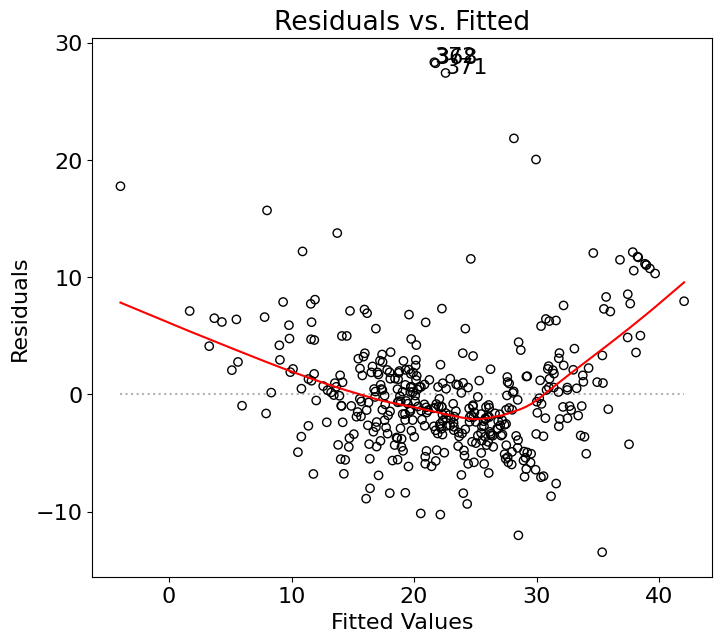

In [ ]:
# Plotting residuals vs. fitted values for checking the linearity assumption between
# the dependent and indipendent variables

# More on diagnostic plots https://data.library.virginia.edu/diagnostic-plots/

import matplotlib.pyplot as plt
from matplotlib import rcParams
from statsmodels.nonparametric.smoothers_lowess import lowess

lr3_residuals = lr3_results.resid
lr3_fitted = lr3_results.fittedvalues
lr3_smoothed = lowess(lr3_residuals, lr3_fitted)
lr3_top3 = abs(lr3_residuals).sort_values(ascending = False)[:3]

plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()
ax.scatter(lr3_fitted, lr3_residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(lr3_smoothed[:,0],lr3_smoothed[:,1],color = 'r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(lr3_fitted),max(lr3_fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)

for i in lr3_top3.index:
    ax.annotate(i,xy=(lr3_fitted[i], lr3_residuals[i]))

plt.show()

# If residuals are equally spread around the line, without distinct patterns, that
# is an indication that there are no non-linear relationships, i.e., that the
# linearity assumption is satisfied. In this case, the plot indicate a non-linear
# relationship between the predictors and the response variable.

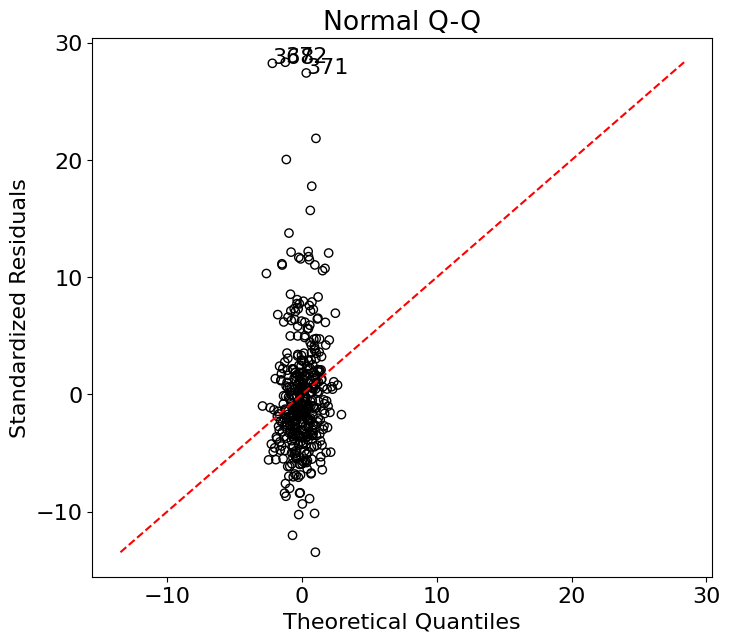

In [ ]:
# Quantile - Quantile (Q-Q) plot for checking if the residuals follow a normal distribution
import scipy.stats as stats

sorted_lr3_residuals = pd.Series(lr3_results.get_influence().resid_studentized_internal)
sorted_lr3_residuals.index = lr3_results.resid.index
sorted_lr3_residuals = sorted_lr3_residuals.sort_values(ascending = True)
df_qq = pd.DataFrame(lr3_residuals)
df_qq.columns = ['sorted_lr3_residuals']
df_qq['theoretical_quantiles'] = stats.probplot(df_qq['sorted_lr3_residuals'], dist = 'norm', fit = False)[0]
rankings = abs(df_qq['sorted_lr3_residuals']).sort_values(ascending = False)
top3 = rankings[:3]

fig, ax = plt.subplots()
x = df_qq['theoretical_quantiles']
y = df_qq['sorted_lr3_residuals']
ax.scatter(x,y, edgecolor = 'k',facecolor = 'none')
ax.set_title('Normal Q-Q')
ax.set_ylabel('Standardized Residuals')
ax.set_xlabel('Theoretical Quantiles')
ax.plot([np.min([x,y]),np.max([x,y])],[np.min([x,y]),np.max([x,y])], color = 'r', ls = '--')
for val in top3.index:
    ax.annotate(val,xy=(df_qq['theoretical_quantiles'].loc[val],df_qq['sorted_lr3_residuals'].loc[val]))
plt.show()

# The residuals should be lined well on the straight deshed line. In this case,
# there is a deviation from the diagonal, and therefore, from the normal distribution.

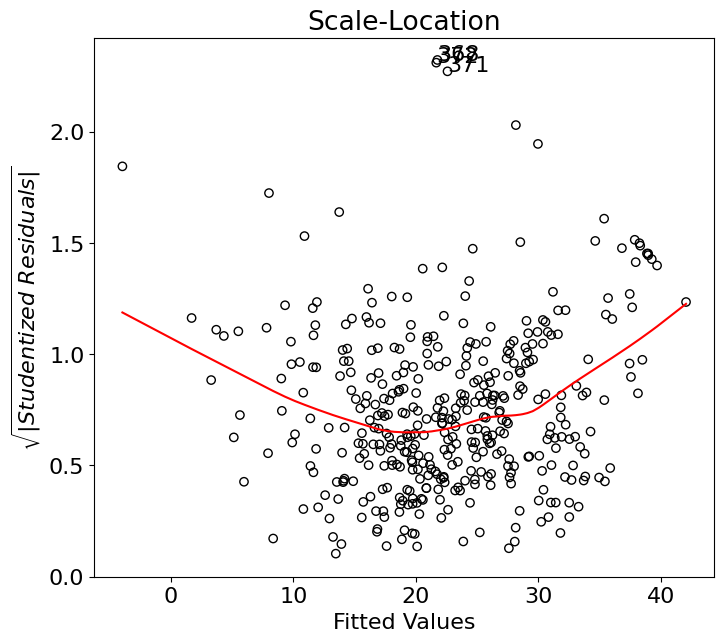

In [ ]:
# Scale - Location plot for checking the assumption of the equal variance of the
# residuals, homoskedasticity

lr3_residuals = lr3_results.get_influence().resid_studentized_internal
lr3_fitted = lr3_results.fittedvalues
sqrt_lr3_residuals = pd.Series(np.sqrt(np.abs(lr3_residuals)))
sqrt_lr3_residuals.index = lr3_results.resid.index
smoothed = lowess(sqrt_lr3_residuals,lr3_fitted)
top3 = abs(sqrt_lr3_residuals).sort_values(ascending = False)[:3]

fig, ax = plt.subplots()
ax.scatter(lr3_fitted, sqrt_lr3_residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('$\sqrt{|Studentized \ Residuals|}$')
ax.set_xlabel('Fitted Values')
ax.set_title('Scale-Location')
ax.set_ylim(0,max(sqrt_lr3_residuals)+0.1)
for i in top3.index:
    ax.annotate(i,xy=(lr3_fitted[i],sqrt_lr3_residuals[i]))
plt.show()

# It is good if the data points seem to be randomly spread above and below the
# line. In this case, the variance of the residuals tends to differ.

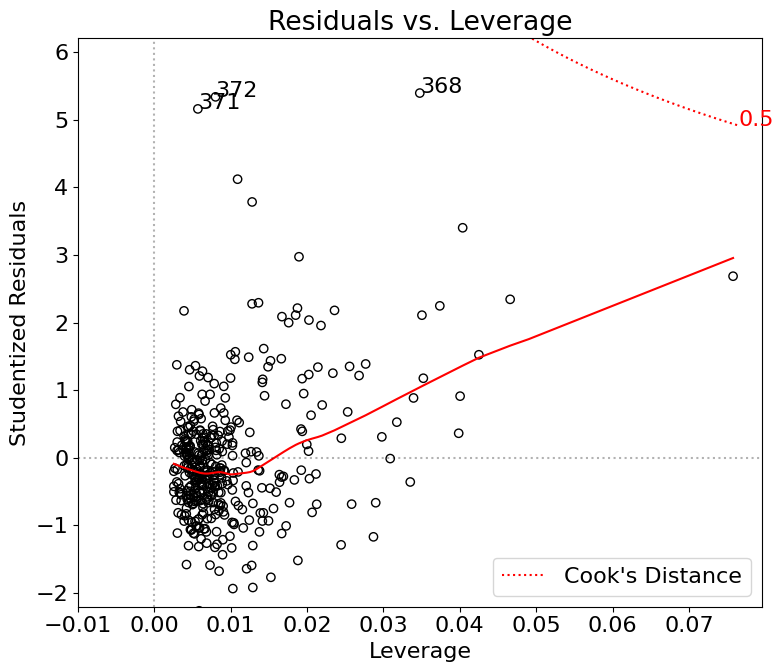

In [ ]:
# Residuals vs. Leverage for spotting the presence of high leverage points

lr3_residuals = pd.Series(lr3_results.get_influence().resid_studentized_internal)
lr3_residuals.index = lr3_results.resid.index
df_residuals = pd.DataFrame(lr3_residuals)
df_residuals.columns = ['lr3_residuals']
df_residuals['leverage'] = lr3_results.get_influence().hat_matrix_diag
smoothed = lowess(df_residuals['lr3_residuals'],df_residuals['leverage'])
sorted_lr3_residuals = abs(df_residuals['lr3_residuals']).sort_values(ascending = False)
top3 = sorted_lr3_residuals[:3]

fig, ax = plt.subplots()
x = df_residuals['leverage']
y = df_residuals['lr3_residuals']
xpos = max(x)+max(x)*0.01  
ax.scatter(x, y, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Studentized Residuals')
ax.set_xlabel('Leverage')
ax.set_title('Residuals vs. Leverage')
ax.set_ylim(min(y)-min(y)*0.15,max(y)+max(y)*0.15)
ax.set_xlim(-0.01,max(x)+max(x)*0.05)
plt.tight_layout()
for val in top3.index:
    ax.annotate(val,xy=(x.loc[val],y.loc[val]))

cooksx = np.linspace(min(x), xpos, 50)
p = len(lr3_results.params)
poscooks1y = np.sqrt((p*(1-cooksx))/cooksx)
poscooks05y = np.sqrt(0.5*(p*(1-cooksx))/cooksx)
negcooks1y = -np.sqrt((p*(1-cooksx))/cooksx)
negcooks05y = -np.sqrt(0.5*(p*(1-cooksx))/cooksx)

ax.plot(cooksx,poscooks1y,label = "Cook's Distance", ls = ':', color = 'r')
ax.plot(cooksx,poscooks05y, ls = ':', color = 'r')
ax.plot(cooksx,negcooks1y, ls = ':', color = 'r')
ax.plot(cooksx,negcooks05y, ls = ':', color = 'r')
ax.plot([0,0],ax.get_ylim(), ls=":", alpha = .3, color = 'k')
ax.plot(ax.get_xlim(), [0,0], ls=":", alpha = .3, color = 'k')
ax.annotate('1.0', xy = (xpos, poscooks1y[-1]), color = 'r')
ax.annotate('0.5', xy = (xpos, poscooks05y[-1]), color = 'r')
ax.annotate('1.0', xy = (xpos, negcooks1y[-1]), color = 'r')
ax.annotate('0.5', xy = (xpos, negcooks05y[-1]), color = 'r')
ax.legend()
plt.show()

# High leverage points can be typically spotted in the corners, that is, beyond the
# dashed line that indicated the Cook's distance (they have high Cook's distance
# score)

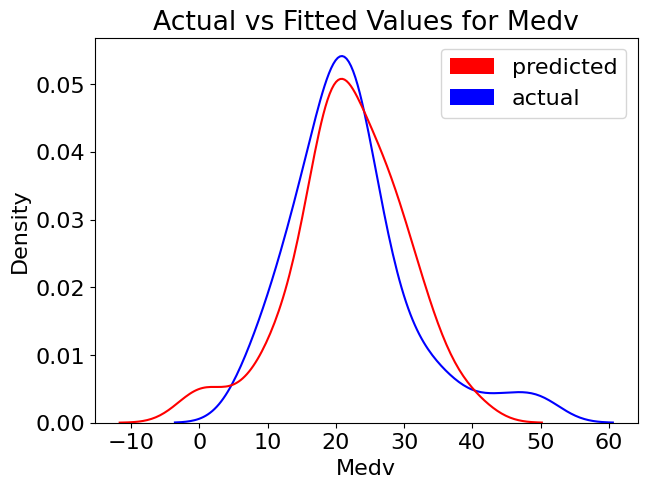

In [ ]:
# Density plot - the predicted against actual values
import matplotlib.patches as  mpatches

plt.figure(figsize=(7, 5))

ax1 = sns.kdeplot(y2_test, color="b", label="Actual Value", legend=True)
sns.kdeplot(predicted_y2_test, color="r", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Medv')
plt.xlabel('Medv')
plt.ylabel('Density')

handles = [mpatches.Patch(facecolor='r', label="predicted"),
           mpatches.Patch(facecolor='b', label="actual")]
plt.legend(handles=handles)

plt.show()
plt.close()

In [ ]:
#@title Multiple Linear Regression 4 with Diagnostics
# Another lm model with the training set including all the variables except chas since
# it is a binary indicator variable, and not a number (such variables can be included
# in regression models; however they require different treatment than numerical variables)

# Splitting data
x4 = df.drop(['chas', 'medv'],axis=1)
y4 = df['medv']

In [ ]:
# Splitting train and test data
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size = 0.2, random_state = 5)

# Shape of the train and test sets
print(x4_train.shape)
print(x4_test.shape)
print(y4_train.shape)
print(y4_test.shape)

(404, 12)
(102, 12)
(404,)
(102,)


In [ ]:
# Building and fitting the linear regression model using statsmodels.api
## sm.add_constant adds an intercept, which is not included by default
lr4 = sm.OLS(y4_train, sm.add_constant(x4_train))
lr4_results = lr4.fit()
print(lr4_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     89.60
Date:                Mon, 24 Apr 2023   Prob (F-statistic):          3.33e-104
Time:                        12:56:54   Log-Likelihood:                -1205.8
No. Observations:                 404   AIC:                             2438.
Df Residuals:                     391   BIC:                             2490.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.3463      5.820      6.588      0.0

In [ ]:
# Predicting values - test dataset
predicted_y4_test = lr4_results.predict(sm.add_constant(x4_test))

In [ ]:
# Comparing the predicted and actual values
df_compare4 = pd.DataFrame({'Actual': y4_test.to_numpy().flatten(), 'Predicted': predicted_y4_test})
df_compare4.head()

,Actual,Predicted
226,37.6,37.953910
292,27.9,32.345908
90,22.6,27.150121
373,13.8,5.674978
273,35.2,32.656251


In [ ]:
#@title Multiple Linear Regression 4 Evaluation
# Test set

# Computing (adjusted) r-squared with formulas from the theory
y4_test_array = y4_test.to_numpy().flatten()
#pred_y4_test_array = predicted_y4_test.flatten()

RSS2 = sum((y4_test_array-predicted_y4_test)**2)       
TSS2 = sum((y4_test_array-np.mean(y4_test_array))**2)     
r_squared4 = 1 - RSS2/TSS2
adj_r_squared4 = 1 - (1-r_squared4)*(len(y4_test_array)-1)/(len(y4_test_array)-x4_test.shape[1]-1)

# another way to calculate r_squared (r2) using sklearn.metrics
r2_4 = r2_score(y4_test, predicted_y4_test)

# Using metrics api to calculate errors
mae4 = metrics.mean_absolute_error(y4_test, predicted_y4_test)
mse4 = metrics.mean_squared_error(y4_test, predicted_y4_test)
rmse4 = np.sqrt(metrics.mean_squared_error(y4_test, predicted_y4_test))

print('R2: ', r2_4)
print('R2: ', r_squared4)  
print('Adjusted R2: ', adj_r_squared4)
print('Mean Absolute Error:', mae4)  
print('Mean Squared Error:', mse4)  
print('Root Mean Squared Error:', rmse4)

R2:  0.7273335657563886
R2:  0.7273335657563886
Adjusted R2:  0.6905695521505084
Mean Absolute Error: 3.2574039706220725
Mean Squared Error: 21.348110002751092
Root Mean Squared Error: 4.620401498003295


In [ ]:
# Checking for mutlicollinearity

# Collinearity refers to the situation when 2 or more predictors are highly related to 
# one another. A simple way to detect collinearity is to look at the correlation matrix
# of the predictors. However, it is possible that collinearity exist between 3 or
# more variables, even if no pair of variables has a particularly high correlation.
# This is known as multicollinearity. One of the assumptions of the multiple linear
# regression is the absence of the multicollinearity. 

# One way of checking multicollinearity is to compute the Variance Inflation Factor (VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor

# For each X, calculate VIF and save in dataframe
vif_lr4 = pd.DataFrame()

# Adding const because the algorithm requires it
x4_train_with_const = sm.add_constant(x4_train)
vif_lr4["VIF Factor"] = [variance_inflation_factor(x4_train_with_const.values, i) for i in range(x4_train_with_const.shape[1])]
vif_lr4["features"] = x4_train_with_const.columns

# As a rule of thumb, variables having a square root of VIFs > 2 are problematic.

# Finding square roots of VIFs
vif_lr4['VIF Factor square root']=vif_lr4['VIF Factor']**(1/2)
vif_lr4.drop(0, axis = 0).sort_values('VIF Factor square root')

,VIF Factor,features,VIF Factor square root
11,1.313019,b,1.145870
1,1.717590,crim,1.310568
10,1.821707,ptratio,1.349706
5,1.834462,rm,1.354423
2,2.368186,zn,1.538891
12,2.844465,lstat,1.686554
6,2.919328,age,1.708604
7,3.977635,dis,1.994401
3,4.048797,indus,2.012162
4,4.625990,nox,2.150811


In [ ]:
#@title Multiple Linear Regression 5 with Diagnostics
# It should be proceded by exluding variables with the highest VIF value one by one.
# First, we exclude tax as the variable with the square root of VIF > 2.

# Splitting data (after removing chas, tax and medv from predictors)
x5 = df.drop(['chas', 'medv', 'tax'],axis=1)
y5 = df['medv']

In [ ]:
# Splitting train and test data
x5_train, x5_test, y5_train, y5_test = train_test_split(x5, y5, test_size = 0.2, random_state = 5)

# Shape of the train and test sets
print(x5_train.shape)
print(x5_test.shape)
print(y5_train.shape)
print(y5_test.shape)

(404, 11)
(102, 11)
(404,)
(102,)


In [ ]:
# Building and fitting the linear regression model using statsmodels.api
## sm.add_constant adds an intercept, which is not included by default
lr5 = sm.OLS(y5_train, sm.add_constant(x5_train))
lr5_results = lr5.fit()
print(lr5_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     94.34
Date:                Mon, 24 Apr 2023   Prob (F-statistic):          7.12e-103
Time:                        13:00:36   Log-Likelihood:                -1211.4
No. Observations:                 404   AIC:                             2447.
Df Residuals:                     392   BIC:                             2495.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.1543      5.856      6.174      0.0

In [ ]:
# Checking for mutlicollinearity

# For each X, calculate VIF and save in dataframe
vif_lr5 = pd.DataFrame()

# Adding const because the algorithm requires it
x5_train_with_const = sm.add_constant(x5_train)
vif_lr5["VIF Factor"] = [variance_inflation_factor(x5_train_with_const.values, i) for i in range(x5_train_with_const.shape[1])]
vif_lr5["features"] = x5_train_with_const.columns

# As a rule of thumb, variables having a square root of VIFs > 2 are problematic.

# Finding square roots of VIFs
vif_lr5['VIF Factor square root']=vif_lr5['VIF Factor']**(1/2)
vif_lr5.drop(0, axis = 0).sort_values('VIF Factor square root')

,VIF Factor,features,VIF Factor square root
10,1.311446,b,1.145184
1,1.717514,crim,1.310540
9,1.810450,ptratio,1.345530
5,1.823366,rm,1.350321
2,2.239610,zn,1.496533
11,2.842614,lstat,1.686005
6,2.917612,age,1.708102
8,2.985764,rad,1.727936
3,3.326911,indus,1.823982
7,3.976089,dis,1.994013


In [ ]:
#@title Multiple Linear Regression 6 with Diagnostics
# It should be proceded by exluding variables with the highest VIF value one by one.
# Now, we exclude nox as the variable with the square root of VIF > 2.

# Splitting data (after removing chas, tax, nox and medv from predictors)
x6 = df.drop(['chas', 'medv', 'tax', 'nox'],axis=1)
y6 = df['medv']

In [ ]:
# Splitting train and test data
x6_train, x6_test, y6_train, y6_test = train_test_split(x6, y6, test_size = 0.2, random_state = 5)

# Shape of the train and test sets
print(x6_train.shape)
print(x6_test.shape)
print(y6_train.shape)
print(y6_test.shape)

(404, 10)
(102, 10)
(404,)
(102,)


In [ ]:
# Building and fitting the linear regression model using statsmodels.api
## sm.add_constant adds an intercept, which is not included by default
lr6 = sm.OLS(y6_train, sm.add_constant(x6_train))
lr6_results = lr6.fit()
print(lr6_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     99.55
Date:                Mon, 24 Apr 2023   Prob (F-statistic):          3.36e-101
Time:                        13:01:19   Log-Likelihood:                -1217.8
No. Observations:                 404   AIC:                             2458.
Df Residuals:                     393   BIC:                             2502.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.8013      4.983      4.977      0.0

In [ ]:
# Checking for mutlicollinearity

# For each X, calculate VIF and save in dataframe
vif_lr6 = pd.DataFrame()

# Adding const because the algorithm requires it
x6_train_with_const = sm.add_constant(x6_train)
vif_lr6["VIF Factor"] = [variance_inflation_factor(x6_train_with_const.values, i) for i in range(x6_train_with_const.shape[1])]
vif_lr6["features"] = x6_train_with_const.columns

# As a rule of thumb, variables having a square root of VIFs > 2 are problematic.

# Finding square roots of VIFs
vif_lr6['VIF Factor square root']=vif_lr6['VIF Factor']**(1/2)
vif_lr6.drop(0, axis = 0).sort_values('VIF Factor square root')

,VIF Factor,features,VIF Factor square root
9,1.308140,b,1.143740
8,1.634033,ptratio,1.278293
1,1.713353,crim,1.308951
4,1.816637,rm,1.347827
2,2.236312,zn,1.495430
7,2.662024,rad,1.631571
5,2.754315,age,1.659613
10,2.800910,lstat,1.673592
3,2.934267,indus,1.712970
6,3.635168,dis,1.906612


In [ ]:
#@title Multiple Linear Regression 7 with Diagnostics
# Since indus and dis are highly mutually correlated (check the correlation matrix),
# and the square root of the VIF value for dis is close to 2, dis should be also excluded.


# Splitting data (after removing chas, tax, nox and medv from predictors)
x7 = df.drop(['chas', 'medv', 'tax', 'nox', 'dis'],axis=1)
y7 = df['medv']

In [ ]:
# Splitting train and test data
x7_train, x7_test, y7_train, y7_test = train_test_split(x7, y7, test_size = 0.2, random_state = 5)

# Shape of the train and test sets
print(x7_train.shape)
print(x7_test.shape)
print(y7_train.shape)
print(y7_test.shape)

(404, 9)
(102, 9)
(404,)
(102,)


In [ ]:
# Building and fitting the linear regression model using statsmodels.api
## sm.add_constant adds an intercept, which is not included by default
lr7 = sm.OLS(y7_train, sm.add_constant(x7_train))
lr7_results = lr7.fit()
print(lr7_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     99.89
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           5.79e-96
Time:                        13:01:50   Log-Likelihood:                -1232.8
No. Observations:                 404   AIC:                             2486.
Df Residuals:                     394   BIC:                             2526.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.7007      5.034      3.715      0.0

In [ ]:
# Predicting values - test dataset
predicted_y7_test = lr7_results.predict(sm.add_constant(x7_test))

In [ ]:
#@title Multiple Linear Regression 7 Evaluation
# Test set

# Computing (adjusted) r-squared with formulas from the theory
y7_test_array = y7_test.to_numpy().flatten()
#pred_y7_test_array = predicted_y7_test.flatten()

RSS7 = sum((y7_test_array-predicted_y7_test)**2)       
TSS7 = sum((y7_test_array-np.mean(y7_test_array))**2)     
r_squared7 = 1 - RSS7/TSS7
adj_r_squared7 = 1 - (1-r_squared7)*(len(y7_test_array)-1)/(len(y7_test_array)-x7_test.shape[1]-1)

# another way to calculate r_squared (r2) using sklearn.metrics
r2_7 = r2_score(y7_test, predicted_y7_test)

# Using metrics api to calculate errors
mae7 = metrics.mean_absolute_error(y7_test, predicted_y7_test)
mse7 = metrics.mean_squared_error(y7_test, predicted_y7_test)
rmse7 = np.sqrt(metrics.mean_squared_error(y7_test, predicted_y7_test))

print('R2: ', r2_7)
print('R2: ', r_squared7)  
print('Adjusted R2: ', adj_r_squared7)
print('Mean Absolute Error:', mae7)  
print('Mean Squared Error:', mse7)  
print('Root Mean Squared Error:', rmse7)

R2:  0.6690383545753089
R2:  0.6690383545753089
Adjusted R2:  0.6366616718707196
Mean Absolute Error: 3.6622768331402997
Mean Squared Error: 25.912267613054574
Root Mean Squared Error: 5.090409375782519


In [ ]:
#@title Comparison of metrics (test datasets)

df_compare = pd.DataFrame([(r_squared1, r_squared2, r_squared4, r_squared7),
                           (adj_r_squared1, adj_r_squared2, adj_r_squared4, adj_r_squared7),
                           (mae1, mae2, mae4, mae7),
                           (mse1, mse2, mse4, mse7),
                           (rmse1, rmse2, rmse4, rmse7)],
           columns=('Simple Linear Regression', 'Multiple Linear Regression 2', 'Multiple Linear Regression 4', 'Multiple Linear Regression 7'),
           index=('R2', 'Adjusted R2', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error')
                 )

df_compare.head()

,Simple Linear Regression,Multiple Linear Regression 2,Multiple Linear Regression 4,Multiple Linear Regression 7
R2,0.504152,0.691588,0.727334,0.669038
Adjusted R2,0.499194,0.682147,0.690570,0.636662
Mean Absolute Error,4.552098,3.691477,3.257404,3.662277
Mean Squared Error,38.821829,24.146782,21.348110,25.912268
Root Mean Squared Error,6.230717,4.913938,4.620401,5.090409
